In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KKa7sXLtgeouJUEdymmR")
project = rf.workspace("image-process-1mqey").project("crosswalk-ta")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crosswalk-TA-4 in yolov8:: 100%|██████████| 2340/2340 [00:00<00:00, 3073.93it/s]


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [ ]:
!yolo task= segment mode= train data= /content/crosswalk-TA-4/data.yaml model=yolov8n-seg.pt epochs=50 batch=4 imgsz=640

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/crosswalk-TA-4/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [ ]:
!yolo task= segment  mode= predict model= /content/runs/segment/train5/weights/best.pt batch= 4 imgsz= 640 conf= 0.5 source= /content/crosswalk-TA-4/test/images

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs

image 1/112 /content/crosswalk-TA-4/test/images/100_jpg.rf.029d09ef7556fef119879d224c9476a5.jpg: 384x640 1 crosswalk, 12.1ms
image 2/112 /content/crosswalk-TA-4/test/images/100_jpg.rf.fa23273172f65f219d2acbe12247702f.jpg: 384x640 1 crosswalk, 12.1ms
image 3/112 /content/crosswalk-TA-4/test/images/103_jpg.rf.d5b5c3c387855dc47f13641d8a9432f8.jpg: 384x640 1 crosswalk, 12.1ms
image 4/112 /content/crosswalk-TA-4/test/images/104_jpg.rf.369c5a4f1d7b06fa251320bea25f0c65.jpg: 384x640 1 crosswalk, 12.1ms
image 5/112 /content/crosswalk-TA-4/test/images/104_jpg.rf.bd147041937db91a892416409a581d37.jpg: 384x640 1 crosswalk, 4.5ms
image 6/112 /content/crosswalk-TA-4/test/images/108_jpg.rf.5e42241269ddab2b603fc28fb7ecce1e.jpg: 384x640 1 crosswalk, 4.5ms
image 7/112 /content/crosswalk-TA-4/test/images/128_jpg.rf.65c3a8ad761e530a952f78

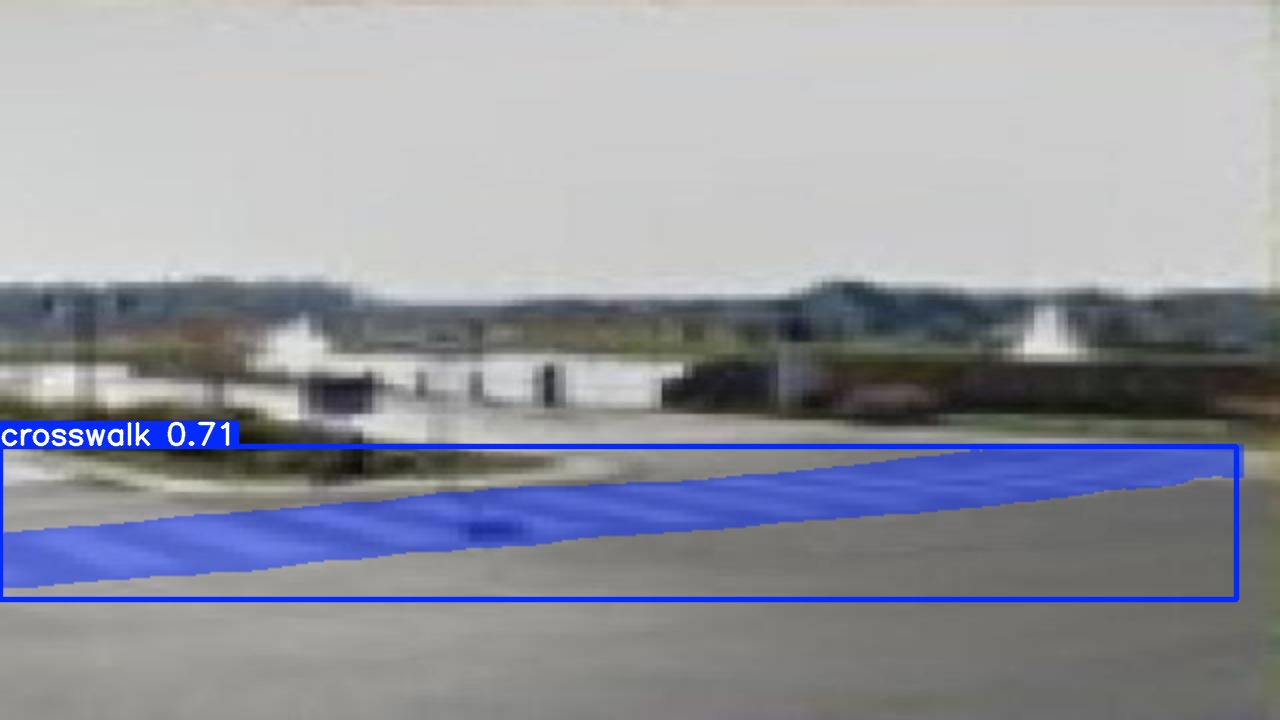

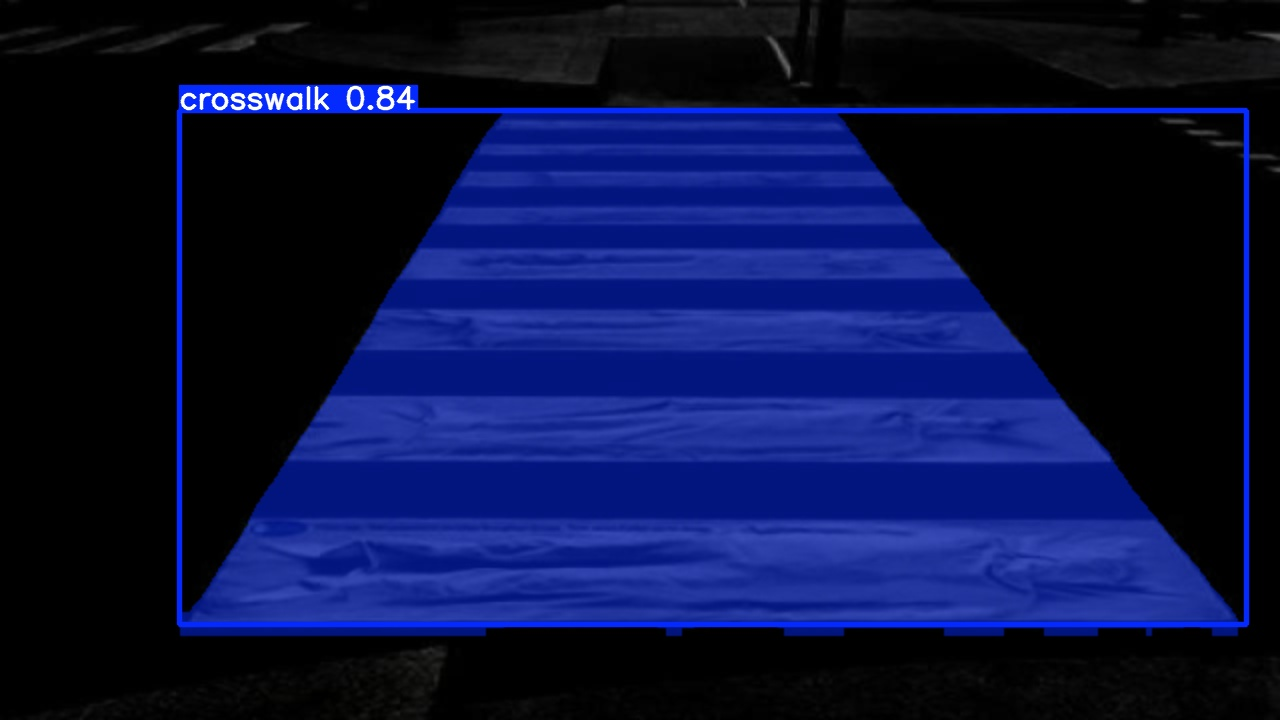

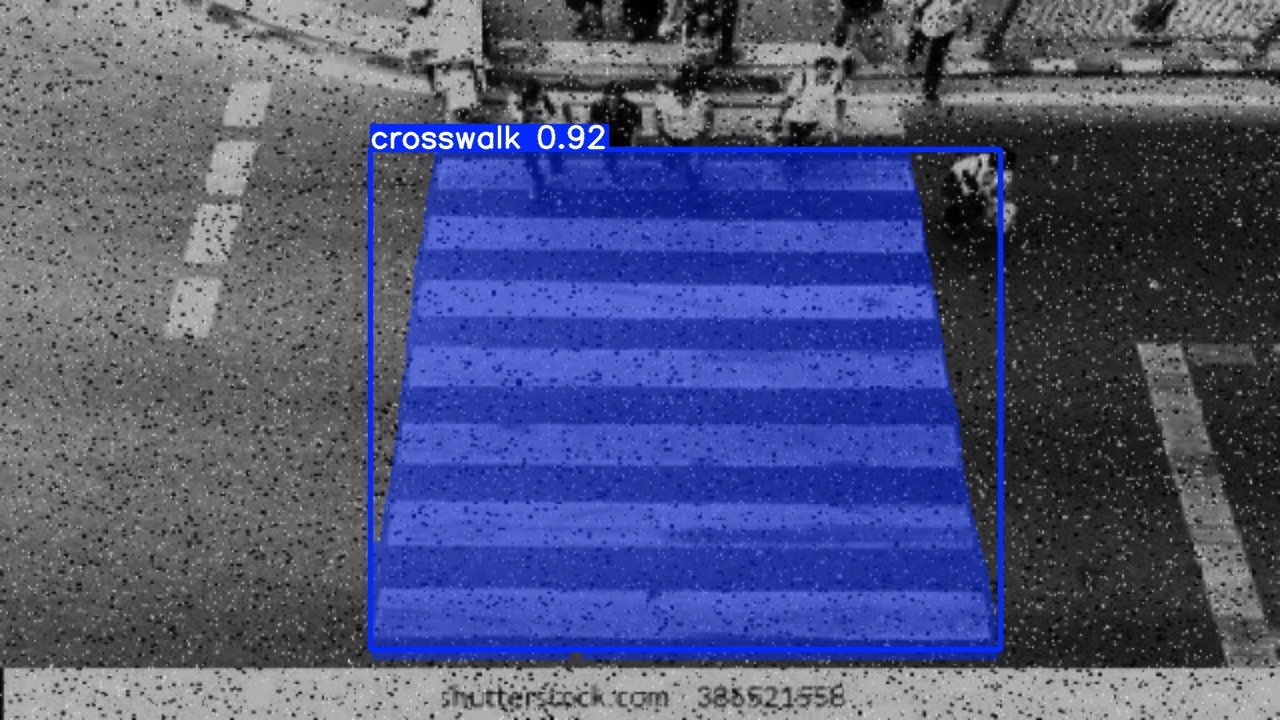

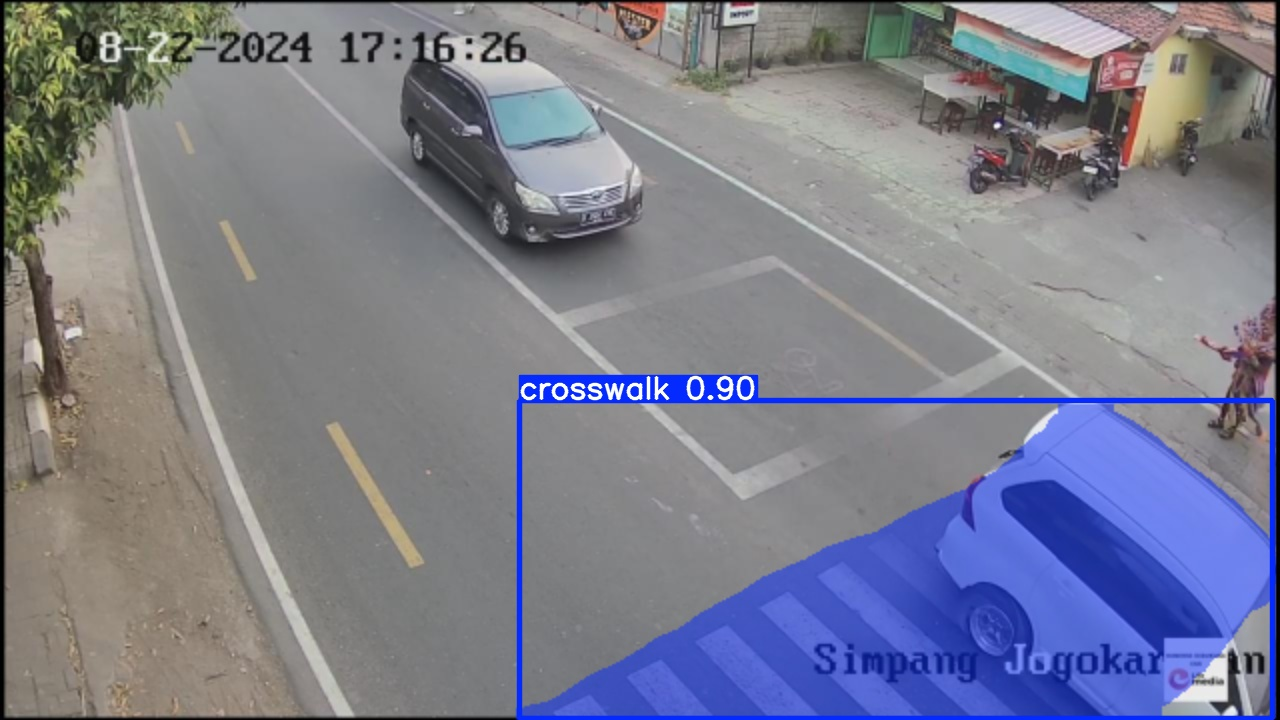

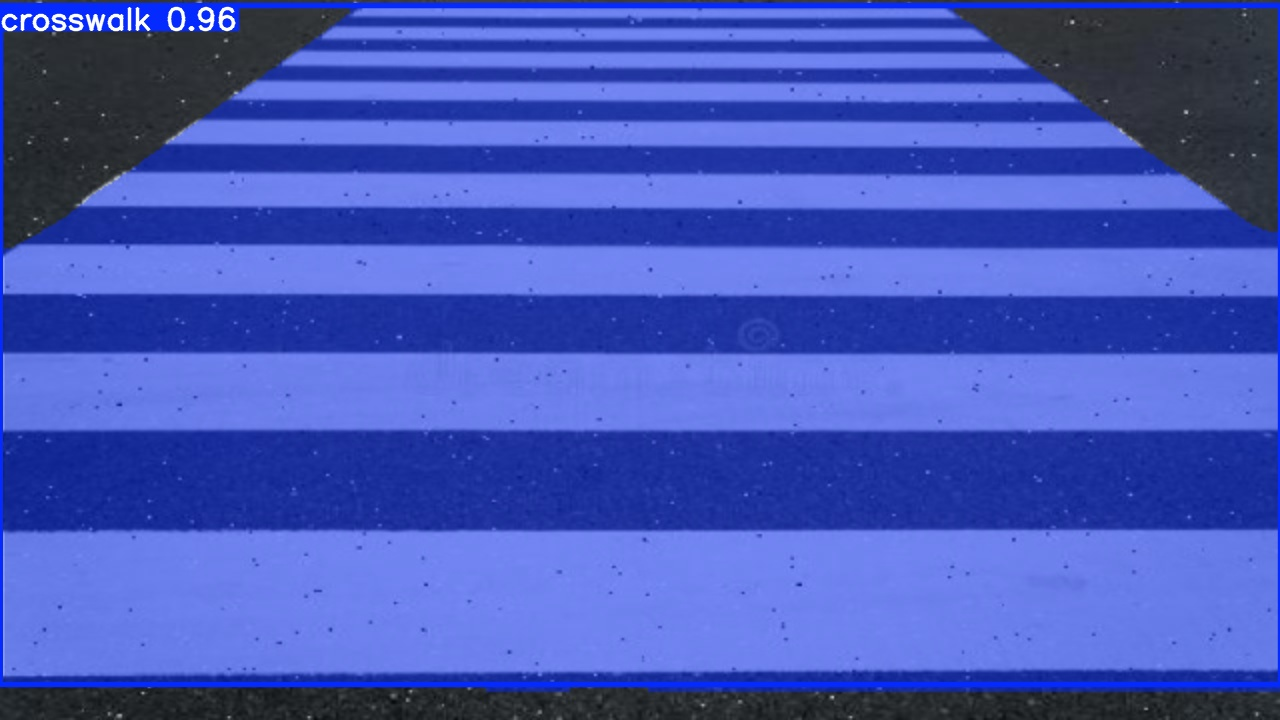

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/segment/predict/*.jpg')[:5]:
  print('\n')
  display(Image(filename= imageName))

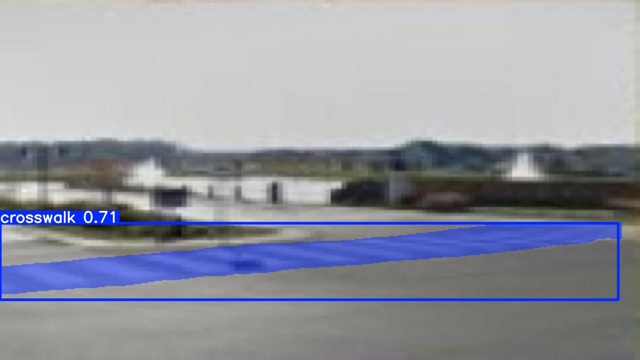

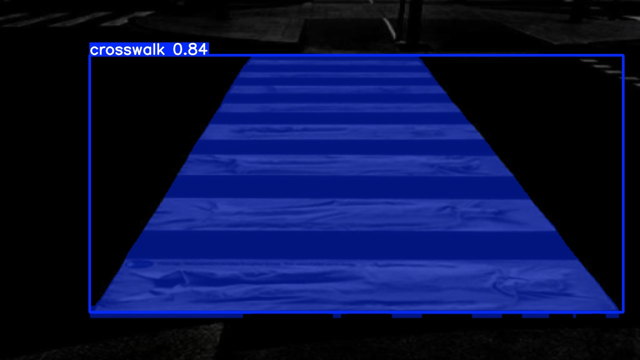

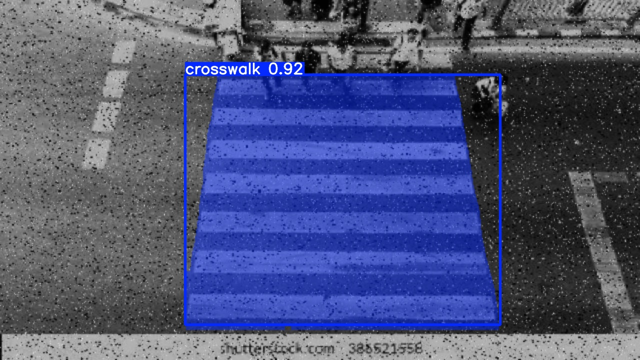

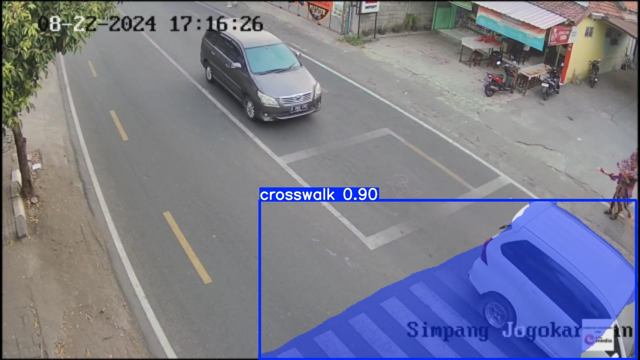

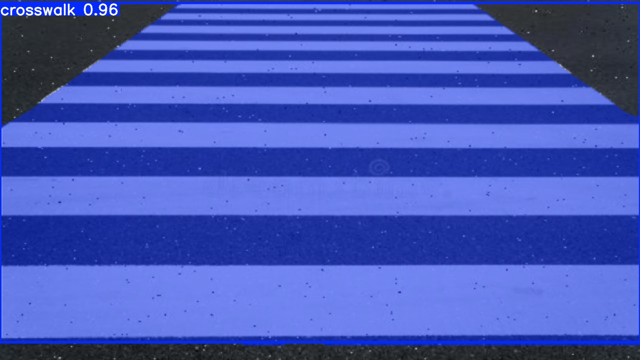

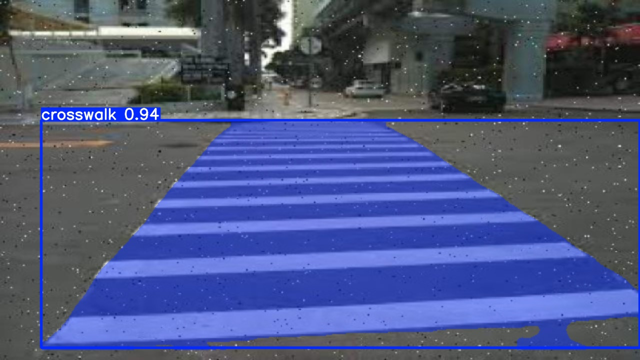

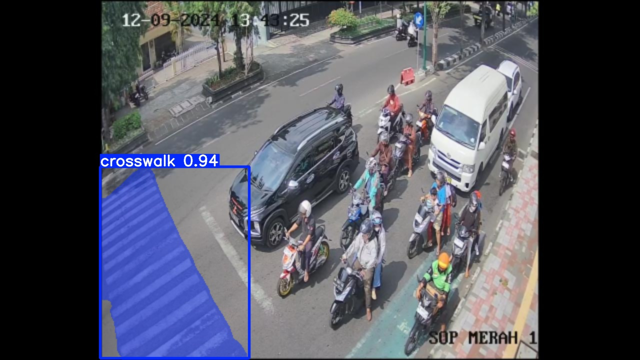

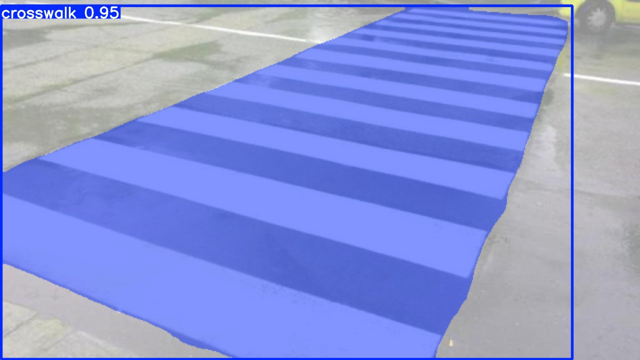

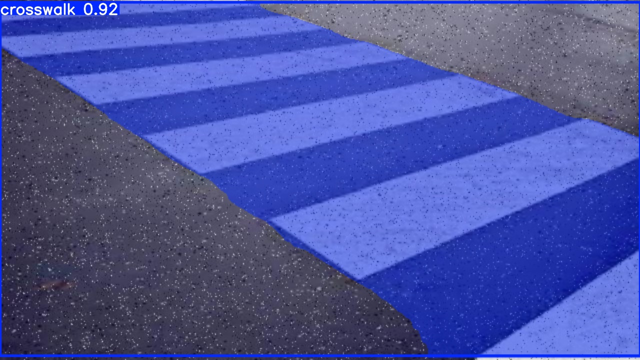

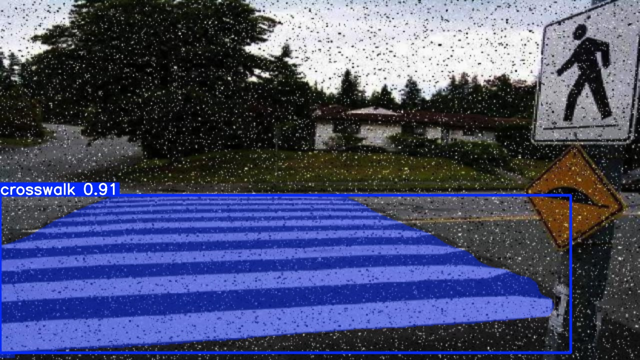

In [ ]:
# prompt: how to decrease the size of image in above code

from roboflow import Roboflow
import ultralytics
import glob
from IPython.display import Image, display
from PIL import Image as PILImage

# ... (Your existing code for Roboflow and YOLOv8) ...

for imageName in glob.glob('/content/runs/segment/predict/*.jpg')[:5]:
  print('\n')
  # Open the image using Pillow library
  img = PILImage.open(imageName)

  # Resize the image (e.g., to 50% of its original size)
  width, height = img.size
  new_width = int(width * 0.5)
  new_height = int(height * 0.5)
  img = img.resize((new_width, new_height))

  # Display the resized image
  display(img)